# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#Loading Data

In [2]:
X, y = make_blobs(n_samples=200, centers=3, random_state=0, cluster_std=0.6)

In [3]:
X[:10,:]

array([[-1.65104622,  3.44598961],
       [ 0.76752279,  4.39759671],
       [ 1.06923853,  4.53068484],
       [-1.46826903,  3.26765447],
       [ 1.15521298,  5.09961887],
       [-1.06295223,  2.20755388],
       [ 2.36790645,  0.55219088],
       [ 1.75644805,  2.05538289],
       [ 1.05241733,  4.54498095],
       [-1.64129611,  2.68097255]])

In [4]:
y[:10]

array([2, 0, 0, 2, 0, 2, 1, 1, 0, 2])

# Visualizing the Data

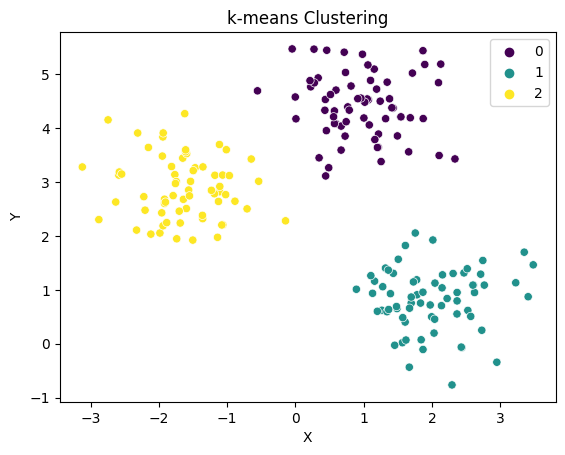

In [5]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='viridis')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('k-means Clustering')
plt.show()

# Pre-processing the data

Performing standardization

In [6]:
x_scaled=StandardScaler().fit_transform(X)
df_x=pd.DataFrame(x_scaled)
df_x.sample(5)

,0,1
143,0.543933,-1.333580
34,0.681300,-1.696695
197,1.311823,-1.021766
20,-0.993614,0.264592
27,-1.484801,-0.411777


# Specifying k

In [7]:
# No of neighbour i.e. K value input
k=int(input("Enter the value of k : "))
print(k)

Enter the value of k : 3
3


# Applying K-Means

Defining model

In [8]:
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
model=kmeans.fit(x_scaled)

Getting predictions

In [9]:
# Getting predictions
y_pred=model.predict(x_scaled)

In [10]:
y_pred

array([0, 2, 2, 0, 2, 0, 1, 1, 2, 0, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1,
       2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 0,
       1, 1, 0, 1, 1, 2, 2, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 2, 0,
       2, 1, 0, 0, 1, 2, 1, 2, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2, 1, 2, 2, 1,
       2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 1, 0, 2, 1, 2, 0, 1, 0, 2, 0, 1,
       1, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 1, 0, 0, 0,
       2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 1, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 0, 1, 1, 1, 2, 0, 1, 2, 2, 0, 0, 1, 1, 1, 1, 0, 1,
       2, 1], dtype=int32)

# Comparing Predictions

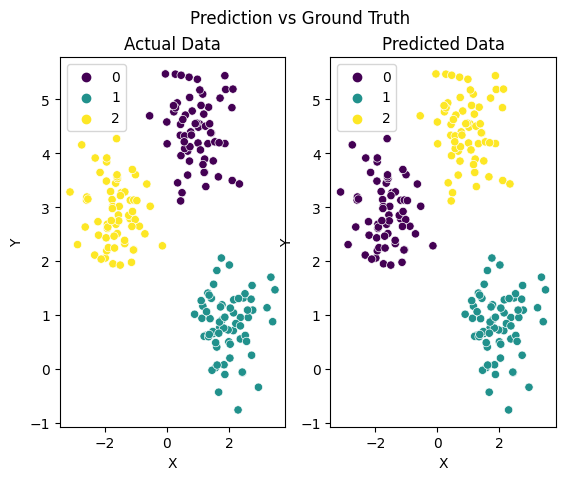

In [11]:
plt.subplot(1,2,1)
plt.title("Actual Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='viridis')
plt.subplot(1,2,2)
plt.title("Predicted Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_pred, palette='viridis')
plt.suptitle("Prediction vs Ground Truth")
plt.show()

# Determining Optimal k-value

Elbow Method

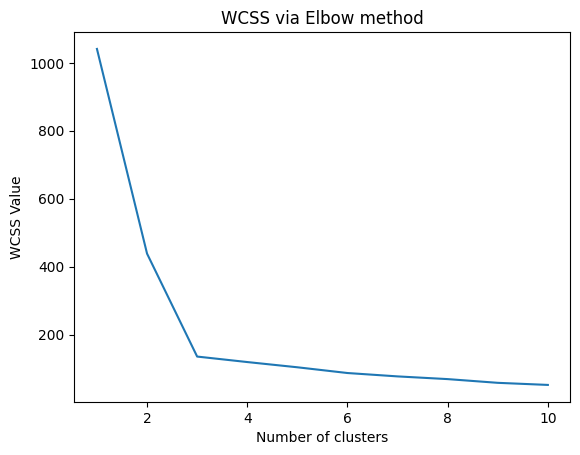

In [12]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=42, n_init="auto")
  model=kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('WCSS via Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS Value')

plt.show()

# Calculating Silhouette Coefficient

Separating each cluster

In [13]:
#Separating each cluster

clusters=[]

for i in range(k):
    clusters.append([list(x_scaled[j,:]) for j in range(len(x_scaled)) if y_pred[j]==i])

Calculating sihouette coefficient for each point

In [14]:
s_c=[]
for l in range(k):
    for i in clusters[l]:
        #a_i
        a_i=sum([math.dist(i,j) for j in clusters[l]])/(len(clusters[l])-1)

        #b_i
        b_i=min([(sum([math.dist(i,j) for j in clusters[c]])/len(clusters[c])) for c in range(k) if c!=l])

        #s_i
        s_i=(b_i-a_i)/(max(a_i, b_i))

        s_c.append(s_i)

Overall Sihouette coefficient

In [15]:
#Overall Sihouette coefficient

print("The Overall Sihouette coefficient is: ", np.mean(s_c))

The Overall Sihouette coefficient is:  0.676934660128552
